# COVID-19 Analysis & Prediction on World and USA Data

This notebook visualizes and predicts the spread of the novel coronavirus, also known as SARS-CoV-2. It is a contagious respiratory virus that first started in Wuhan in December 2019. On 11 February 2020, the disease is officially named COVID-19 by the World Health Organization. 
<br>

In this project, the COVID-19 data by Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) is used for analysis and visualizations.

<br>Data: <a href='https://github.com/CSSEGISandData/COVID-19'>https://github.com/CSSEGISandData/COVID-19</a>
    
***Note: This data is updated on a regular basis. For updated visualizations please run the notebook* <br>
*Last Updated: 5th of May, 2020***

**Import Required Libraries**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import scipy as sp
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

**Import data**

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-30-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-30-2020.csv')

In [3]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-01 02:32:28,34.223334,-82.461707,31,0,0,31,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-01 02:32:28,30.295065,-92.414197,130,10,0,120,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-01 02:32:28,37.767072,-75.632346,264,4,0,260,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-01 02:32:28,43.452658,-116.241552,671,16,0,655,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-01 02:32:28,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


**View Data Samples**

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,726,736,750,766,773,782,789,795,803,820
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,743,743,743,745,745,747,748,750,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26,27,27,27,27,30,35,35,35,36


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,50,57,58,60,64,68,72,85,90,95
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,28,28,30,30,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,425,432,437,444,450,453,459,463,465,470
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,40,40,41,42,42,43,44,45,45,46
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,207,220,228,252,260,310,331,345,397,421
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,410,422,431,455,470,488,519,531,543,570
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,344,385,398,423,468,468,472,493,499,514
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,7,7,11,11,11,11,11


In [7]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-01 02:32:32,32.3182,-86.9023,7088,272,0,6816.0,1,151.165615,87196.0,978.0,3.837472,84000001,USA,1859.627115,13.797968
1,Alaska,US,2020-05-01 02:32:32,61.3707,-152.4044,355,9,252,94.0,2,59.389476,19119.0,NaN,2.535211,84000002,USA,3198.499705,NaN
2,American Samoa,US,2020-05-01 02:32:32,-14.2710,-170.1320,0,0,0,0.0,60,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-05-01 02:32:32,33.7298,-111.4312,7655,320,1499,5836.0,4,105.169634,71786.0,1169.0,4.180274,84000004,USA,986.245241,15.271065
4,Arkansas,US,2020-05-01 02:32:32,34.9697,-92.3731,3281,61,1305,1915.0,5,126.727145,48379.0,402.0,1.859189,84000005,USA,1868.617052,12.252362


In [8]:
cols = confirmed_df.keys()

**Get the dates and number of cases associated with that date**

In [9]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [10]:
dates = confirmed.keys()

The next cell is for storing the data into different lists for making it easy to visualize. Of the different lists, one is for storing mortality rate and another is for storing recovery rate.

<br>Mortality rate can be defined as the ratio of number of deaths recorded against the total number of cases recorded and this is calculated using the following formula:<br>

$$mortality\;rate = \frac{no.\:of\:deaths}{no.\:of\:confirmed\:cases}$$

<br>Recovery rate can be defined as the ratio of number of recovered patients recorded against the total number of cases recorded and this is calculated using the following formula:<br>

$$recovery\:rate = \frac{no.\:of\:recovered\:cases}{no.\:of\:confirmed\:cases}$$

In [11]:
# storing world data
world_cases = [] # to store total cases
total_deaths = [] # to store total deaths
mortality_rate = [] # to store mortality rate
recovery_rate = [] # to store recovery rate
total_recovered = [] 
total_active = [] 

# storing US data
us_cases = [] 
us_deaths = [] 
us_recoveries = []


for i in dates:
    # calculate sums
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())    
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())

Now that we have all the data of the recorded cases, let us calculate the day-wise change in count of cases, deaths, and recoveries. The function in the following cell helps to calculate this change

In [12]:
def get_daily_increase(data):
    '''
    INPUT - a list containing day by day case counts
    
    OUTPUT - a list containing the day by day increment of count 
    
    Function to count the daily increment in figures
    '''
    increment_count = [] 
    for i in range(len(data)):
        if i == 0:
            increment_count.append(data[0])
        else:
            increment_count.append(data[i]-data[i-1])
    return increment_count

In [13]:
# confirmed cases
world_daily_increase = get_daily_increase(world_cases)
us_daily_increase = get_daily_increase(us_cases)

# deaths
world_daily_death = get_daily_increase(total_deaths)
us_daily_death = get_daily_increase(us_deaths)

# recoveries
world_daily_recovery = get_daily_increase(total_recovered)
us_daily_recovery = get_daily_increase(us_recoveries)

In [14]:
# days from the first day in the dataset i.e. Jan 22, 2020 (1/22/2020)
days = np.array([i for i in range(len(dates))]).reshape(-1, 1)

# reshaping the data
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

**Days for Future Forecast**

In [15]:
num_days_future = 15
forecast_future = np.array([i for i in range(len(dates)+num_days_future)]).reshape(-1, 1)
adjusted_dates = forecast_future[:-15]

The dates in dataset are in int64 format. Convert these into date-time format

In [16]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
dates_for_forecast_future = []
for i in range(len(forecast_future)):
    dates_for_forecast_future.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

### Visualizing the data

In [17]:
def plot_stats(x_data, y_data, title, y_label):
    '''
    INPUT - data to be plotted on X-axis and Y-axis and a strings for title, and y-axis label
    
    OUTPUT - function doesn't return anything but prints required plots
    '''
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.xlabel('Days Since Jan 22, 2020')
    plt.ylabel(y_label)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [18]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

**World wide COVID-19 data trends**

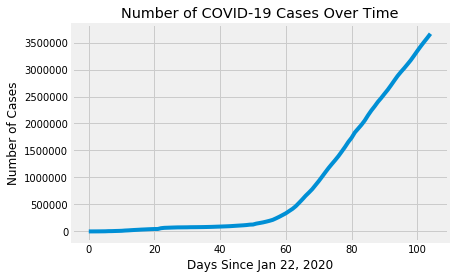

In [19]:
plot_stats(adjusted_dates, world_cases,'Number of COVID-19 Cases Over Time','Number of Cases')

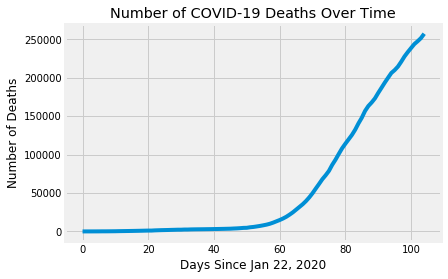

In [20]:
plot_stats(adjusted_dates, total_deaths,'Number of COVID-19 Deaths Over Time','Number of Deaths')

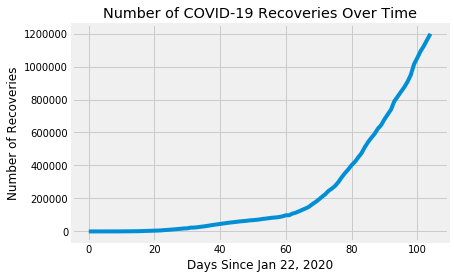

In [21]:
plot_stats(adjusted_dates, total_recovered, 'Number of COVID-19 Recoveries Over Time', 'Number of Recoveries')

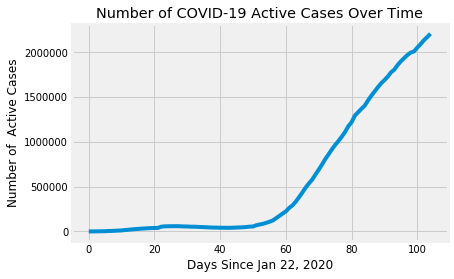

In [22]:
plot_stats(adjusted_dates, total_active, 'Number of COVID-19 Active Cases Over Time','Number of  Active Cases')

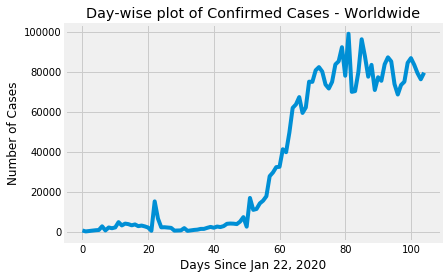

In [23]:
plot_stats(adjusted_dates, world_daily_increase, 'Day-wise plot of Confirmed Cases - Worldwide', 'Number of Cases')

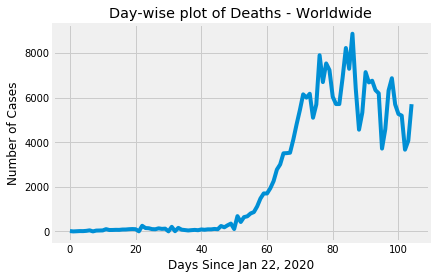

In [24]:
plot_stats(adjusted_dates, world_daily_death, 'Day-wise plot of Deaths - Worldwide','Number of Cases')

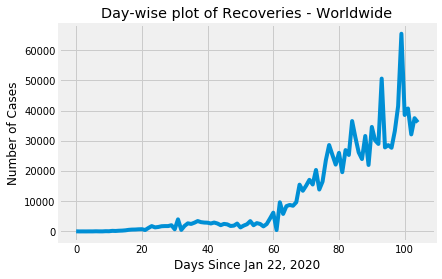

In [25]:
plot_stats(adjusted_dates, world_daily_recovery, 'Day-wise plot of Recoveries - Worldwide', 'Number of Cases')

**USA wide data trends**

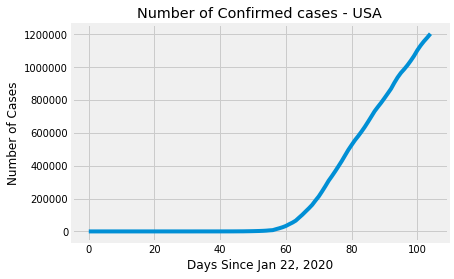

In [26]:
plot_stats(adjusted_dates,us_cases,'Number of Confirmed cases - USA','Number of Cases')

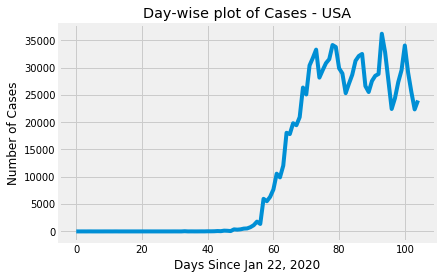

In [27]:
plot_stats(adjusted_dates,us_daily_increase,'Day-wise plot of Cases - USA','Number of Cases')

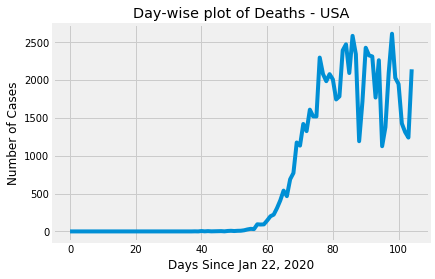

In [28]:
plot_stats(adjusted_dates,us_daily_death,'Day-wise plot of Deaths - USA','Number of Cases')

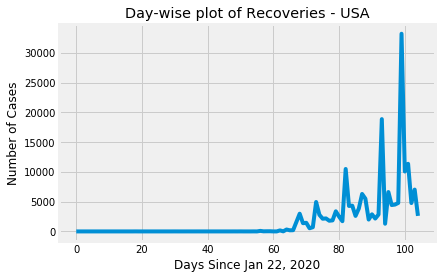

In [29]:
plot_stats(adjusted_dates,us_daily_recovery,'Day-wise plot of Recoveries - USA','Number of Cases')

**State wise COVID-19 cases analysis**

As we obtained and visualized the data of world and the US, the following cells are for plotting the region wise data

In [30]:
states =  list(latest_data.loc[latest_data['Country_Region'] == 'US','Province_State'].unique())

In [31]:
states_confirmed_cases = []
states_death_cases = [] 
states_recovery_cases = []
states_mortality_rate = [] 

no_cases = [] 
for state in states:
    cases = latest_data[latest_data['Province_State']==state]['Confirmed'].sum()
    if cases > 0:
        states_confirmed_cases.append(cases)
    else:
        no_cases.append(state)
 
# removing the areas with zero cases
if len(no_cases) != 0:
    for area in no_cases:
        states.remove(area)
    
states = [k for k, v in sorted(zip(states, states_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(states)):
    states_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
    states_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
    states_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
    states_mortality_rate.append(states_death_cases[i]/states_confirmed_cases[i])

In [32]:
# number of cases per US state
state_df = pd.DataFrame({'State': states, 'Number of Confirmed Cases': states_confirmed_cases,'Number of Deaths': states_death_cases, 'Mortality Rate': states_mortality_rate})

# number of cases per country/region
state_df.style.background_gradient(cmap='Oranges')

,State,Number of Confirmed Cases,Number of Deaths,Mortality Rate
0,New York,304372,23587,0.077494
1,New Jersey,118652,7228,0.0609176
2,Massachusetts,62205,3562,0.0572623
3,Illinois,52918,2355,0.0445028
4,California,50130,2031,0.0405147
5,Pennsylvania,47971,2475,0.0515937
6,Michigan,41379,3789,0.0915682
7,Florida,33690,1268,0.0376373
8,Texas,28727,812,0.0282661
9,Louisiana,28001,1905,0.0680333


**Plotting the 10 states with the most confirmed cases. The remaining states are grouped into "others" category**

In [33]:
def plot_bar_graphs(x_axis, y_axis, title):
    '''
    INPUT - variables to be plotted on X-axis and Y-axis, and title
    
    OUTPUT - function doesn't return anything but prints required plots
    '''
    plt.figure()
    plt.barh(x_axis, y_axis)
    plt.title(title)
    plt.show()

In [34]:
visual_unique_states = [] 
visual_confirmed_cases = []
others = np.sum(states_confirmed_cases[10:])
for i in range(len(states_confirmed_cases[:10])):
    visual_unique_states.append(states[i])
    visual_confirmed_cases.append(states_confirmed_cases[i])

visual_unique_states.append('Others')
visual_confirmed_cases.append(others)

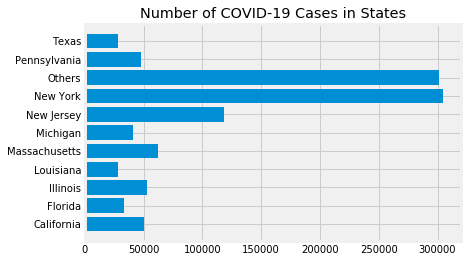

In [35]:
plot_bar_graphs(visual_unique_states, visual_confirmed_cases, 'Number of COVID-19 Cases in States')

**Plotting the same in a pie chart**

In [36]:
def plot_pie_charts(x_axis, y_axis, title):
    '''
    INPUT - variables to be plotted on X-axis and Y-axis, and title
    
    OUTPUT - function doesn't return anything but prints required plots
    
    '''
    plt.figure(figsize=(15,15))
    plt.title(title)
    plt.pie(y_axis, colors= random.choices(list(mcolors.CSS4_COLORS.values()),k = len(states)))
    plt.legend(x_axis, loc='best')
    plt.show()

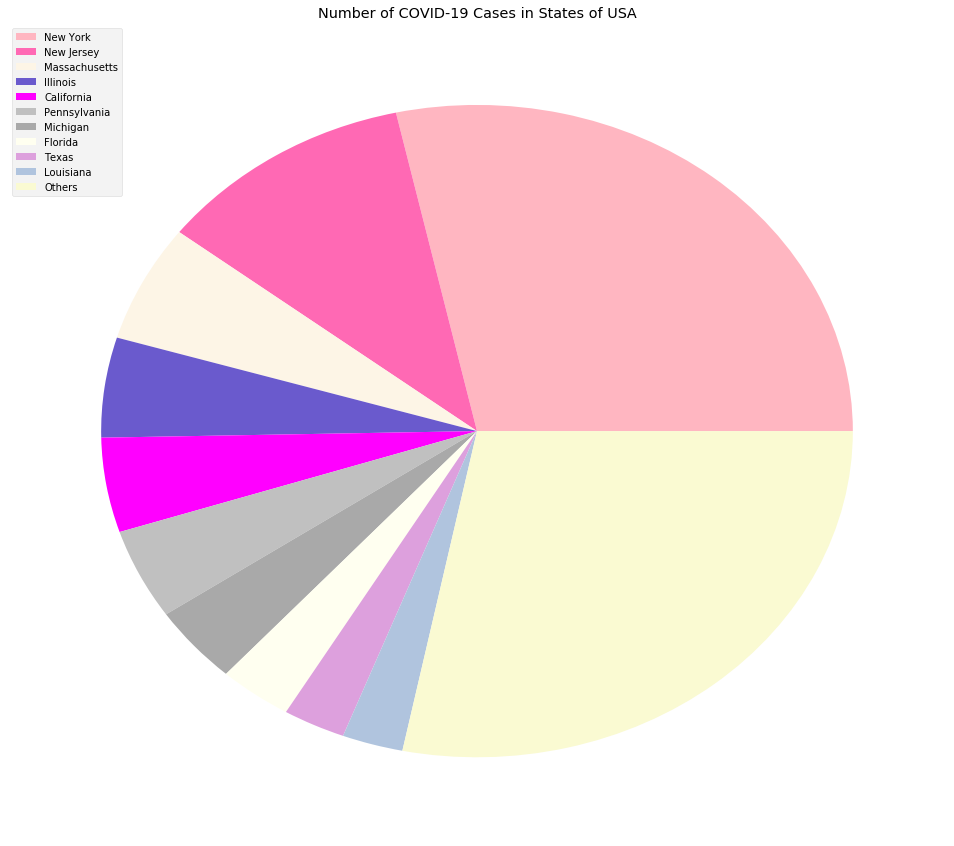

In [37]:
plot_pie_charts(visual_unique_states, visual_confirmed_cases, 'Number of COVID-19 Cases in States of USA')

**Plot Worldwide Mortality and Recovery Rates**

In [38]:
def plot_rates(x_axis,y_axis,title,y_label,color):
    '''
    INPUT - data to be plotted on X-axis and Y-axis and a strings for title, legend, and y-axis label
    
    OUTPUT - function doesn't return anything but prints required plots
    '''
    mean_rate = np.mean(y_axis)
    plt.plot(x_axis, y_axis, color = color)
    plt.axhline(y = mean_rate,linestyle='--', color='black')
    plt.title(title)
    plt.legend([y_label, 'y='+str(mean_rate)])
    plt.xlabel('Days Since Jan 22,2020')
    plt.ylabel(y_label)
    plt.show()

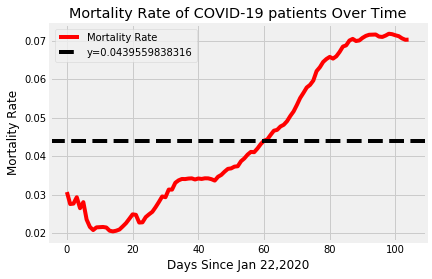

In [39]:
plot_rates(adjusted_dates, mortality_rate, 'Mortality Rate of COVID-19 patients Over Time', 'Mortality Rate','red')

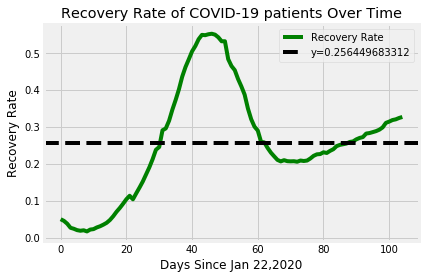

In [40]:
plot_rates(adjusted_dates, recovery_rate, 'Recovery Rate of COVID-19 patients Over Time', 'Recovery Rate','green')

**Split Data**
<br>
Now I'm predicting the number of confirmed cases for the next 15 days. For this first, we have to split the data into train and test sets

In [41]:
X_confirmed_train, X_confirmed_test, y_confirmed_train, y_confirmed_test = train_test_split(days, world_cases, test_size=0.30, shuffle=False) 

**Models for predicting confirmed cases**<br> I used variants of LinearRegression to compare the performance
<br>*Note that this is just a simple model and the results are not accurate*

In [42]:
# define linear regression model
linear_model = LinearRegression(normalize=True, fit_intercept=False)

In [43]:
# function to train the model and predict the number of probable cases
def execute_linear_model(X_confirmed_train, y_confirmed_train, X_confirmed_test, forecast_future):
    '''
    INPUT - the split data
    
    OUTPUT - executes linear model and prints MAE & MSE, returns predicted values
    '''
    linear_model.fit(X_confirmed_train, y_confirmed_train)
    test_linear_pred = linear_model.predict(X_confirmed_test)
    linear_pred = linear_model.predict(forecast_future)
    print('MAE:', mean_absolute_error(test_linear_pred, y_confirmed_test))
    print('MSE:',mean_squared_error(test_linear_pred, y_confirmed_test))
    return test_linear_pred, linear_pred

In [44]:
# function to plot the models predictions against the test data
def plot_model_predictions(model,y_confirmed_test,test_linear_pred):
    '''
    INPUT - model name, predicted and actual lables
    
    OUTPUT - displays graphs
    '''
    plt.plot(y_confirmed_test)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data',  model+' Regression Predictions'])

In [45]:
test_linear_pred, linear_pred = execute_linear_model(X_confirmed_train, y_confirmed_train,X_confirmed_test,forecast_future)

MAE: 1865856.47111
MSE: 3.95169642026e+12


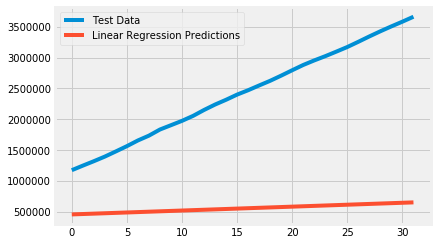

In [46]:
plot_model_predictions('Linear',y_confirmed_test,test_linear_pred)

It can be seen that normal LinearRegression did not work well with the data. Try using Polynomial Regression. <br> For that first transform the data

In [47]:
# transform our data for polynomial variants of linear regression
def transform_to_poly(degree=2):
    '''
    INPUT - degree 
    
    OUTPUT - returns the transformed data
    
    Transorms data into required polymonial degree
    '''
    poly = PolynomialFeatures(degree)
    poly_X_confirmed_train = poly.fit_transform(X_confirmed_train)
    poly_X_confirmed_test = poly.fit_transform(X_confirmed_test)
    poly_forecast_future = poly.fit_transform(forecast_future)
    
    return poly_X_confirmed_train, poly_X_confirmed_test, poly_forecast_future

In [48]:
poly_2_X_confirmed_train, poly_2_X_confirmed_test, poly_2_forecast_future = transform_to_poly(degree = 2)

In [49]:
test_ploy_2_pred, poly_2_pred = execute_linear_model(poly_2_X_confirmed_train,y_confirmed_train,poly_2_X_confirmed_test,poly_2_forecast_future)

MAE: 951180.468258
MSE: 1.0202446143e+12


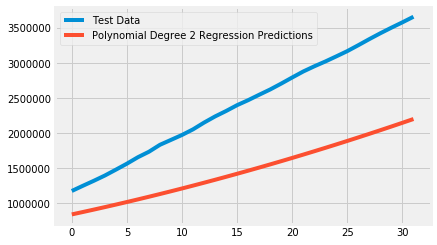

In [50]:
plot_model_predictions('Polynomial Degree 2',y_confirmed_test,test_ploy_2_pred)

In [51]:
poly_3_X_confirmed_train, poly_3_X_confirmed_test, poly_3_forecast_future = transform_to_poly(degree = 3)

In [52]:
test_ploy_3_pred, poly_3_pred = execute_linear_model(poly_3_X_confirmed_train,y_confirmed_train,poly_3_X_confirmed_test,poly_3_forecast_future)

MAE: 447195.898712
MSE: 423940090719.0


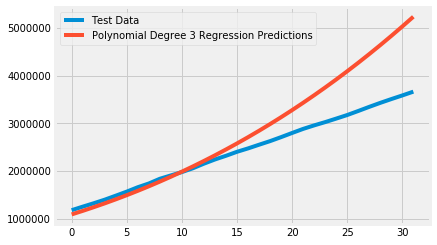

In [53]:
plot_model_predictions('Polynomial Degree 3',y_confirmed_test,test_ploy_3_pred)

Now, we shall plot predictions of the 3 variants against the confirmed cases

In [54]:
def plot_future_predictions(x_data, y_data, predictions, algorithms):
    '''
    INPUT - 
        x_data & y_data: data for x-axis and y-axis
        predictions1,predictions2,predictions3: predictions by te above declared models
        algo_1_name,algo_2_name,algo_3_name: names for algorithms to show in graph legend
        
    OUTPUT - 
        This function doesn't return anything but prints the predictions of models against current confirmed cases
    '''
    
    plt.figure(figsize=(12, 9))
    plt.plot(x_data, y_data)
    for prediction in predictions:
        plt.plot(forecast_future, prediction, linestyle='dashed')
    plt.title('Number of COVID-19 Cases Over Time')
    plt.xlabel('Days Since Jan 22, 2020')
    plt.ylabel('Number of Cases')
    legend = ['Confirmed Cases']
    for algorithm in algorithms:
        legend.append(algorithm)
    plt.legend(legend)
    plt.ticklabel_format(style = 'plain')
    plt.show()

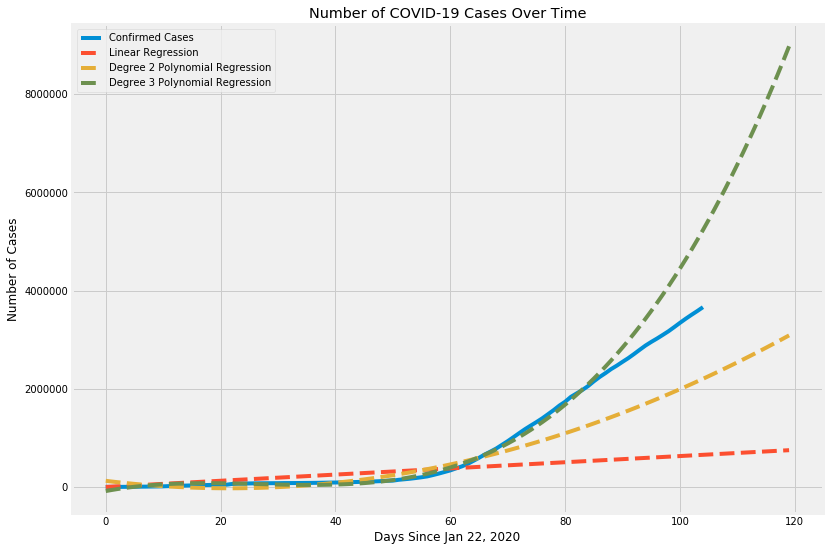

In [55]:
pred = [linear_pred, poly_2_pred, poly_3_pred]
algos = ['Linear Regression','Degree 2 Polynomial Regression','Degree 3 Polynomial Regression']
plot_future_predictions(adjusted_dates, world_cases,pred,algos)

It can be seen that the Polynomial variant with degree three performed well compared to other two variants of the Linear Regression model.

<br> 

The next cell is for displaying our predictions for the next 15 days that we obtained using the Polynomial model.
<br>*Note that this is just a simple model and the results are not accurate*

In [56]:
poly_3_preds = poly_3_pred.reshape(1,-1)[0]
poly_3_df = pd.DataFrame({'Date': dates_for_forecast_future[-15:], 'Number of worldwide cases predicted': np.round(poly_3_preds[-15:])})
poly_3_df

,Date,Number of worldwide cases predicted
0,05/06/2020,5443228.0
1,05/07/2020,5657852.0
2,05/08/2020,5878025.0
3,05/09/2020,6103819.0
4,05/10/2020,6335302.0
5,05/11/2020,6572546.0
6,05/12/2020,6815619.0
7,05/13/2020,7064592.0
8,05/14/2020,7319535.0
9,05/15/2020,7580517.0
